### Import library and locate txt files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import numpy as np
import os
import glob
import re

In [2]:
# path = r'F:\OneDrive - University of Toronto\chemical vehicle\22-23\color sensor\longitudinal data analysis\data' # use your path
path = r'data' 
all_files_path = glob.glob(os.path.join(path, "*.txt"))
all_files_path # print all file locations to double check

['data\\11.txt',
 'data\\12.txt',
 'data\\13.txt',
 'data\\14.txt',
 'data\\15.txt',
 'data\\16.txt',
 'data\\17.txt',
 'data\\18.txt',
 'data\\20.txt',
 'data\\21.txt',
 'data\\22.txt',
 'data\\23.txt',
 'data\\24.txt',
 'data\\25.txt',
 'data\\26.txt',
 'data\\27.txt',
 'data\\31.txt',
 'data\\32.txt',
 'data\\33.txt',
 'data\\34.txt',
 'data\\35.txt',
 'data\\36.txt',
 'data\\37.txt',
 'data\\38.txt',
 'data\\39.txt',
 'data\\4.txt',
 'data\\40.txt',
 'data\\41.txt',
 'data\\42.txt',
 'data\\43.txt',
 'data\\44.txt',
 'data\\45.txt',
 'data\\46.txt',
 'data\\48.txt',
 'data\\49.txt',
 'data\\5.txt',
 'data\\50.txt',
 'data\\6.txt',
 'data\\7.txt',
 'data\\8.txt',
 'data\\9.txt']

### Import data

In [3]:
# Unit test code for trail No. < 16
file_path = 'data\\6.txt'
df_cb = []

file_name = int(re.search('[\w-]+?(?=\.)', file_path).group()) # add Trail column so 
df = pd.read_csv(file_path, sep = " ", header = None, engine='python') # import txt file, sepearate each row into columns by " "

df.columns = ["R", "G", "B", "C", "cur_avg", "prev_avg", "read_idx", "Time", "NaN"] # Assign column name to each column
Measured_time = float(df[df["R"] == "Measured"]["B"])
df.insert(9, "Measured_time", Measured_time)
df = df.drop(df[df.R == "Measured"].index)

df.R = pd.to_numeric(df.R.str[2:]) # remove the first n character of each entry and convert the cell type into integer
df.G = pd.to_numeric(df.G.str[2:]) 
df.B = pd.to_numeric(df.B.str[2:])
df.C =pd.to_numeric( df.C.str[2:])
df.Time = pd.to_numeric(df.Time.str[5:])
df.insert(0, "trial", file_name)
df_cb.append(df)

In [ ]:
# Unit test code for trail No. >= 16
file_path = 'data\\16.txt'
df_cb = []

file_name = int(re.search('[\w-]+?(?=\.)', file_path).group()) # add Trail column so 
df = pd.read_csv(file_path, sep = " ", header = None, engine='python') # import txt file, sepearate each row into columns by " "

df = df.drop(df.columns[[8, 9, 11, 12]], axis = 1)
df.columns = ["R", "G", "B", "C", "cur_avg", "prev_avg", "read_idx", "Time", "Measured_time"] # Assign column name to each column
Measured_time = float(df[df["R"] == "Measured"]["B"])
df.Measured_time = Measured_time
df = df.drop(df[df.R == "Measured"].index)

df.R = pd.to_numeric(df.R.str[2:]) # remove the first n character of each entry and convert the cell type into integer
df.G = pd.to_numeric(df.G.str[2:]) 
df.B = pd.to_numeric(df.B.str[2:])
df.C =pd.to_numeric( df.C.str[2:])
df.Time = pd.to_numeric(df.Time.str[5:])
df.insert(0, "trial", file_name)
df_cb.append(df)
print(df_cb)

file_path = 'data\\31.txt'
df_cb = []

file_name = int(re.search('[\w-]+?(?=\.)', file_path).group()) # add Trail column so 
df = pd.read_csv(file_path, sep = " ", header = None, engine='python') # import txt file, sepearate each row into columns by " "
print(df)

In [ ]:
# Importing txt data files
df_cb = [] # Creat a list to temporarily hold each txt df and concat at the end will save memory and running time
for file_path in all_files_path:
    file_name = int(re.search('[\w-]+?(?=\.)', file_path).group()) # add Trail column so 
    df = pd.read_csv(file_path, sep = " ", header = None, engine='python') # import txt file, sepearate each row into columns by " "
    df = df.drop(df[df[1] == "Found"].index)
    
    if int(file_name) < 16:
        df.columns = ["R", "G", "B", "C", "cur_avg", "prev_avg", "read_idx", "Time", "NaN"] # Assign column name to each column
        Measured_time = float(df[df["R"] == "Measured"]["B"])
        df.insert(9, "Measured_time", Measured_time)
        df = df.drop(df[df.R == "Measured"].index)
    elif int(file_name) >= 16:
        df = df.drop(df.columns[[8, 9, 11, 12]], axis = 1)
        df.columns = ["R", "G", "B", "C", "cur_avg", "prev_avg", "read_idx", "Time", "Measured_time"] # Assign column name to each column
        Measured_time = float(df[df["R"] == "Measured"]["B"])
        df.Measured_time = Measured_time
        df = df.drop(df[df.R == "Measured"].index)

    df.R = pd.to_numeric(df.R.str[2:]) # remove the first n character of each entry and convert the cell type into integer
    df.G = pd.to_numeric(df.G.str[2:]) 
    df.B = pd.to_numeric(df.B.str[2:])
    df.C =pd.to_numeric( df.C.str[2:])
    df.Time = pd.to_numeric(df.Time.str[5:])
    df.insert(0, "trial", file_name)
    df_cb.append(df)
    print(file_name)

df_cb = pd.concat(df_cb, axis=0, ignore_index=True) # df_cb is the dataframe that stores all data points
df_cb.head() # print data head to double check

In [10]:
# Import lab info for each trail and compile it to df_cb
df_lab = pd.read_csv("lab_info/Lab Data - Blue Bottle - 2022 Fall - Data.csv") #import the csv file
df_lab = df_lab.rename({'Distance, Anticip.': 'Dist_Antic', 'Run ID': 'trial', 'Time, Anticip.': 'Time_Antic'}, axis = 1) #Rename column name for easier reference later
df_lab.head() #Check data

# Attah lab info (anticipated distance) to df_cb
df_cb_lab = df_cb.merge(df_lab[["trial", "Dist_Antic", "Time_Antic"]], on = "trial", how = 'left')
df_cb_lab.head()

,trial,R,G,B,C,cur_avg,prev_avg,read_idx,Time,NaN,Measured_time,Dist_Antic,Time_Antic
0,11,337,473,570,1497,cur_avg2659,prev_avg2776,read_idx2,0.123,NaN,54.687,15.0,52.71
1,11,336,465,558,1475,cur_avg2541,prev_avg2659,read_idx3,0.262,NaN,54.687,15.0,52.71
2,11,335,466,558,1477,cur_avg2423,prev_avg2541,read_idx4,0.401,NaN,54.687,15.0,52.71
3,11,334,463,554,1468,cur_avg2304,prev_avg2423,read_idx5,0.540,NaN,54.687,15.0,52.71
4,11,336,468,558,1481,cur_avg2187,prev_avg2304,read_idx6,0.679,NaN,54.687,15.0,52.71


### Plotting

In [52]:
df_measured_time = df_cb_lab[df_cb_lab["Time"] == df_cb_lab["Measured_time"]] # generate a summary df for all end points
df_antic_time = df_cb_lab.groupby('Dist_Antic')['Time_Antic'].mean() # generate summary df for all anticipated endtime
df_antic_time = df_antic_time.reset_index()

In [55]:
# Set Anticpated distance
Antic_dist = 15
Antic_time = df_antic_time[df_antic_time["Dist_Antic"] == Antic_dist]["Time_Antic"]

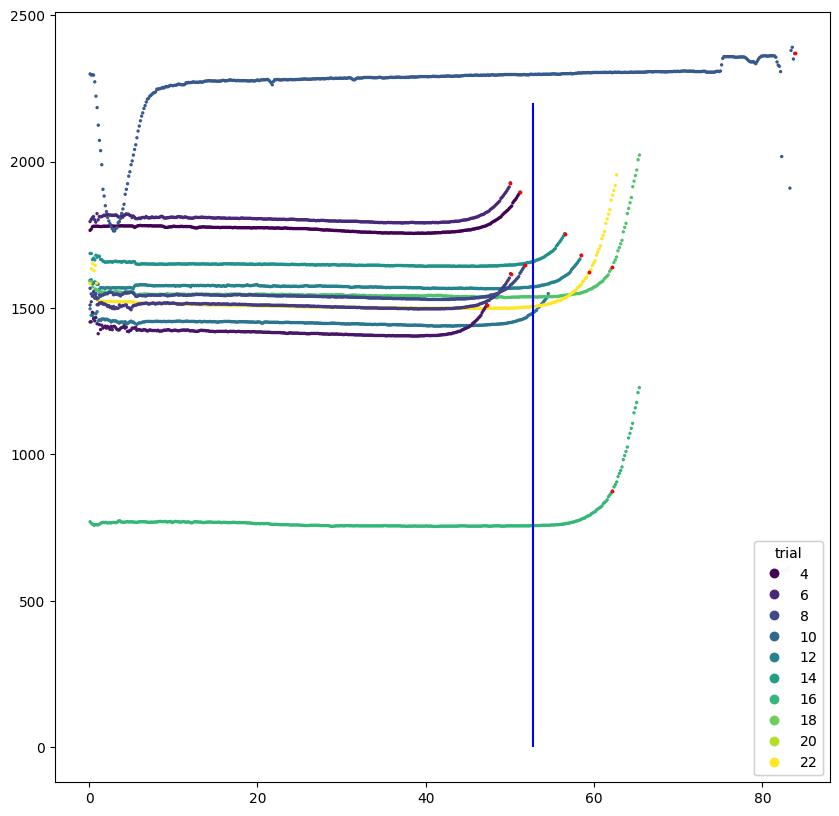

In [56]:
df_plot = df_cb_lab[df_cb_lab["C"] < 2600] # Remove irregular data points at the beginging
df_plot = df_plot[df_plot["Dist_Antic"] == Antic_dist] # Pick trials with anticipated distance
df_measured_time_plot = df_measured_time[df_measured_time["Dist_Antic"] == Antic_dist]

fig, ax = plt.subplots(figsize = (10,10)) # Setting subplot property
scatter = ax.scatter(df_plot.Time, df_plot.C, c=df_plot.trial, s = 2)
scatter_2 = ax.scatter(df_measured_time_plot.Time, df_measured_time_plot.C, c = "red", s = 3)
vline_1 = ax.vlines(x = Antic_time, ymin = 0, ymax = 2200, color = 'b')
legend_c = ax.legend(*scatter.legend_elements(), loc="lower right", title="trial")
ax.add_artist(legend_c)